In [86]:
%matplotlib notebook

In [87]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import importlib
import pyodine.controller.feature_locator
pyodine.controller.feature_locator = importlib.reload(pyodine.controller.feature_locator)
import matplotlib.pyplot as plt
from scipy import signal

In [88]:
loc = pyodine.controller.feature_locator.FeatureLocator()
loc.load_reference('../data/Matlab Spectrum (KD code).txt')

<IPython.core.display.Javascript object>


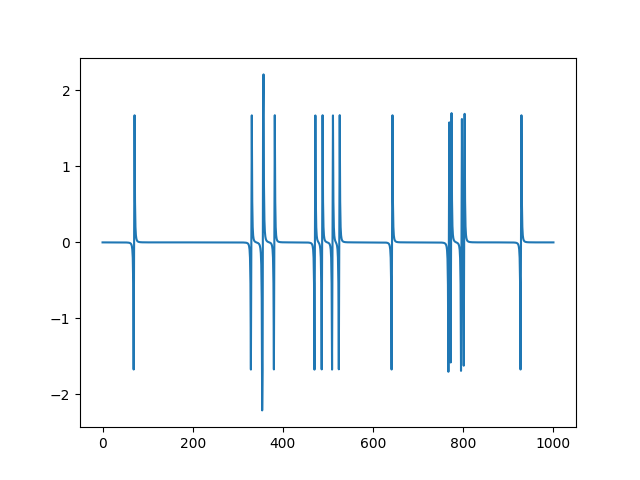

In [89]:
plt.plot(loc.reference)
plt.show()

<IPython.core.display.Javascript object>


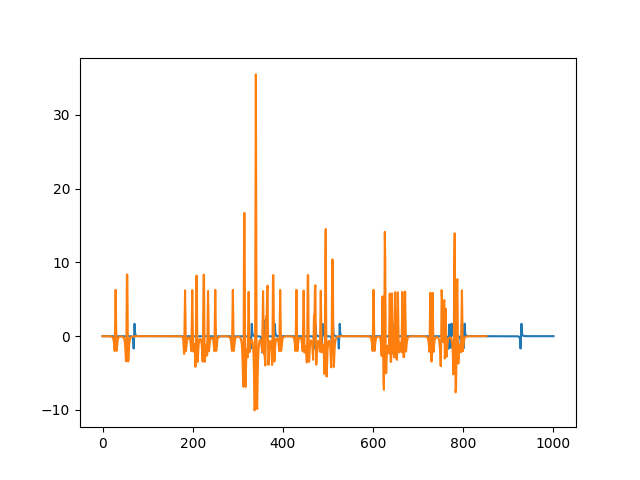

In [90]:
loc.sample = loc.reference[340:490]
plt.figure()
plt.plot(loc.reference)
plt.plot(loc.correlate())
plt.show()

In [91]:
position, confidence = loc.locate_sample()
(position, confidence)

(340, 0.52965302361602318)